导入库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"SimHei.ttf", size=14)

展示其中一帧数据

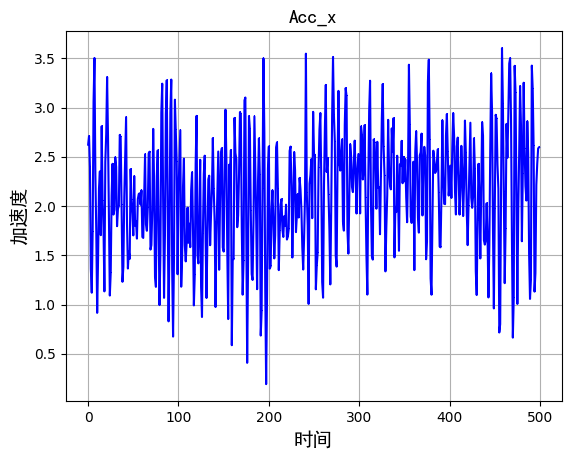

0.191869 3.6051


In [2]:
filepath = "SHL-2024-Train_Bag/train/Bag/Acc_x.txt"
data = np.loadtxt(filepath)
data_to_show = data[np.random.randint(0, len(data))]

plt.plot(data_to_show, marker=",", linestyle='-', color='blue')
plt.title(filepath[-9:-4], fontproperties=font)
plt.xlabel('时间', fontproperties=font)
plt.ylabel('加速度', fontproperties=font)
plt.grid(True)
plt.show()
print(min(data_to_show), max(data_to_show))

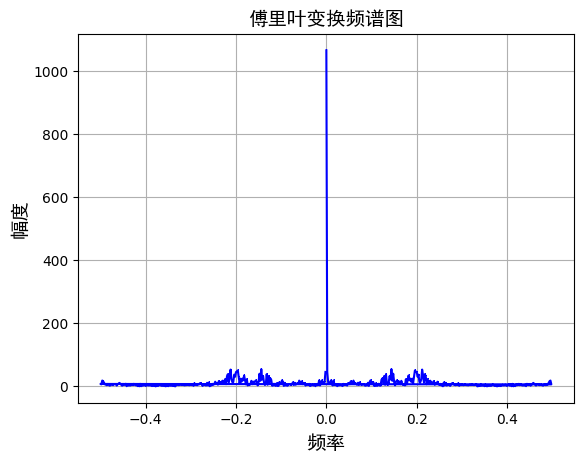

In [3]:
# 对数据进行傅里叶变换
fft_data = np.fft.fft(data_to_show)
fft_freq = np.fft.fftfreq(len(data_to_show))

# 绘制傅里叶变换后的频谱图
plt.plot(fft_freq, np.abs(fft_data), marker=",", linestyle='-', color='blue')

# 设置标题和标签
plt.title('傅里叶变换频谱图', fontproperties=font)
plt.xlabel('频率', fontproperties=font)
plt.ylabel('幅度', fontproperties=font)
plt.grid(True)

# 显示图表
plt.show()

对数据进行处理和保存

In [4]:
def txt2npy(filepath):
    data = np.loadtxt(filepath)
    np.save(filepath[:-4] + ".npy", data)

def batch_convert(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            txt2npy(os.path.join(folder_path, filename))

调用批量转换函数，指定文件夹路径

In [28]:
folder_path = "SHL-2024-Train_Bag/train/Bag"
batch_convert(folder_path)
folder_path = "SHL-2024-Train_Hand/train/Hand"
batch_convert(folder_path)
folder_path = "SHL-2024-Train_Hips/train/Hips"
batch_convert(folder_path)
folder_path = "SHL-2024-Train_Torso/train/Torso"
batch_convert(folder_path)
# folder_path = "SHL-2024-Test" #有脏东西，读出来字符串了
# batch_convert(folder_path)
# folder_path = "SHL-2024-Validation/validation/Bag"
# batch_convert(folder_path)
# folder_path = "SHL-2024-Validation/validation/Hand"
# batch_convert(folder_path)
# folder_path = "SHL-2024-Validation/validation/Hips"
# batch_convert(folder_path)
# folder_path = "SHL-2024-Validation/validation/Torso"
# batch_convert(folder_path)

In [5]:
def txt2npy_fft(filepath):
    data = np.load(filepath)
    new_data_fft = np.zeros((data.shape[0], data.shape[1]), dtype=np.complex128)
    new_fft_freq = np.zeros((data.shape[0], data.shape[1]), dtype=np.float16)
    for i in range(data.shape[0]):
        new_data_fft[i] = np.fft.fft(data[i]).astype(np.complex128)
        new_fft_freq[i] = np.fft.fftfreq(len(data[i])).astype(np.float16)
    np.save(filepath[:-4] + "_fft.npy", new_data_fft)
    np.save(filepath[:-4] + "_fft_freq.npy", new_fft_freq)

def batch_convert_fft(folder_path):
    files = os.listdir(folder_path)
    for filename in files:
        if filename.endswith(".npy"):
            txt2npy_fft(os.path.join(folder_path, filename))

In [6]:
folder_path = "SHL-2024-Train_Bag/train/Bag"
batch_convert_fft(folder_path)
folder_path = "SHL-2024-Train_Hand/train/Hand"
batch_convert_fft(folder_path)
folder_path = "SHL-2024-Train_Hips/train/Hips"
batch_convert_fft(folder_path)
folder_path = "SHL-2024-Train_Torso/train/Torso"
batch_convert_fft(folder_path)